In [93]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick

np.random.seed( 42 )

def rev_function( x, a, b ):
    ## cumulative revenue is a logarithmic growth function
    return a * np.log( x + 1 ) + b

def add_noise( val, sensitivity ):
    noise = np.random.normal( 0, sensitivity )
    return val + noise

def create_user( x, a_true, b_true ):
    a_noised = add_noise( a_true, 1 )
    b_noised = add_noise( b_true, 0.25 )
    noised_revenue = [ rev_function( x_val, a_noised, b_noised ) for x_val in x ]
    return noised_revenue

paying_users = 100
non_paying_users = int( 100 / 0.05 )
num_days = 60
x = np.arange( 1, num_days + 1 )

## true cumulative revenue function parameters
a_true, b_true = 4, 5

users_df = pd.DataFrame( columns=x )

for i in range( paying_users ):
    this_user = create_user( x, a_true, b_true )
    users_df.loc[ len( users_df ) ] = this_user

for i in range( non_paying_users ):
    this_user = [ 0 ] * num_days
    users_df.loc[ len( users_df ) ] = this_user

users_df.loc[ :, 60 ].describe()

count    2100.000000
mean        0.998901
std         4.533837
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        29.241012
Name: 60, dtype: float64

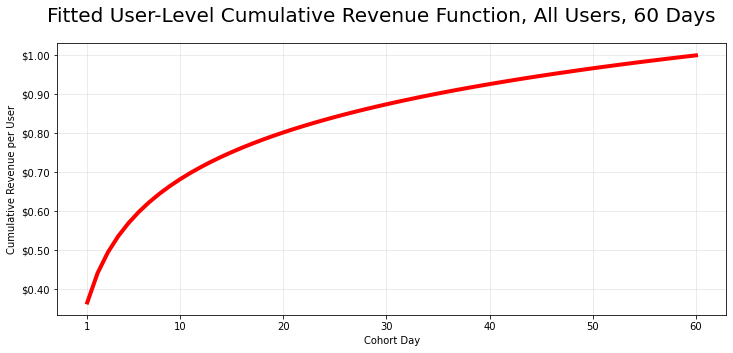

In [142]:
x_data = np.concatenate( [ x ] * len( users_df ) )
y_data = users_df.values.flatten()
popt, pcov = curve_fit( rev_function, x_data, y_data )

## plot violin plus fitted values

fig, ax = plt.subplots( 1, 1, figsize=( 12, 5 ) )
fitted_values = [ rev_function( x_val, *popt ) for x_val in x ]

ax.plot( x, fitted_values, linewidth=4, color='red', linestyle='solid')

ax.grid( alpha=0.3 )
ax.set_xticks( [ x_val for x_val in x if x_val in [ 1, 60 ] or x_val % 10 == 0  ] )

y_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.yaxis.set_major_formatter( y_tick )

ax.set_xlabel( "Cohort Day" )
ax.set_ylabel( "Cumulative Revenue per User" )

plt.suptitle( "Fitted User-Level Cumulative Revenue Function, All Users, 60 Days", fontsize=20 )

plt.show()

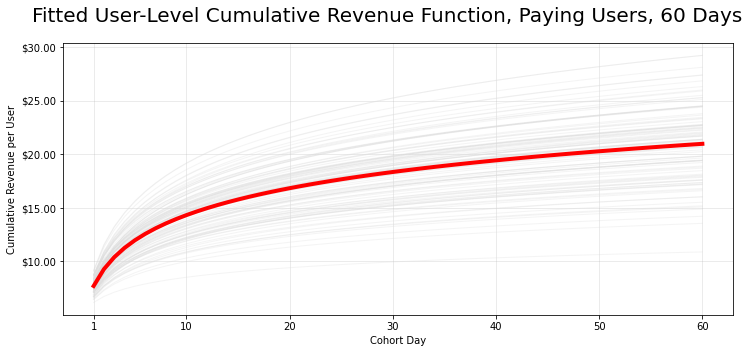

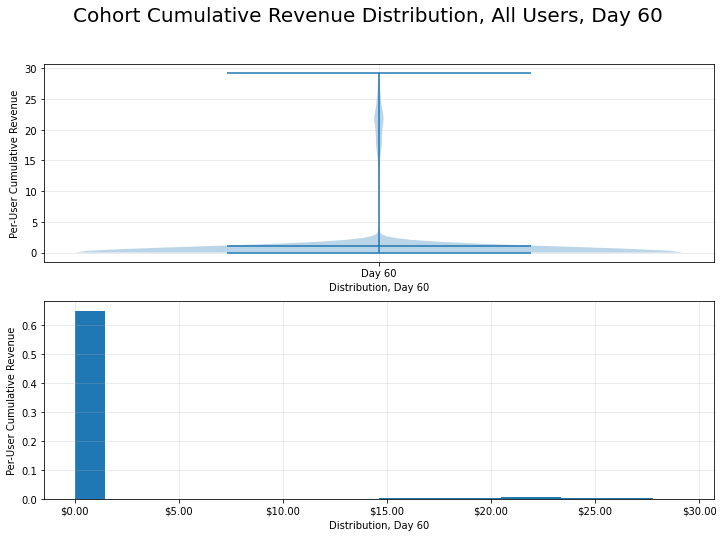

<Figure size 432x288 with 0 Axes>

In [161]:
fig, axes = plt.subplots( 2, 1, figsize=( 12, 8 ) )

## violin plot
axes[ 0 ].violinplot( users_df.loc[ :, 60 ],
                  showmeans=True,
                  showmedians=False )

axes[ 0 ].grid( alpha=0.3 )

y_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.yaxis.set_major_formatter( y_tick )

axes[ 0 ].set_xlabel( "Distribution, Day 60" )
axes[ 0 ].set_ylabel( "Per-User Cumulative Revenue" )

axes[ 0 ].set_xticks( [ 1 ] )
axes[ 0 ].set_xticklabels( [ "Day 60" ] )

## histogram
axes[ 1 ].hist( users_df.loc[ :, 60 ], density=True, bins=20 )
axes[ 1 ].grid( alpha=0.3 )

x_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
axes[ 1 ].xaxis.set_major_formatter( x_tick )

axes[ 1 ].set_xlabel( "Distribution, Day 60" )
axes[ 1 ].set_ylabel( "Per-User Cumulative Revenue" )

plt.suptitle( "Cohort Cumulative Revenue Distribution, All Users, Day 60", fontsize=20 )

plt.show()
plt.tight_layout()

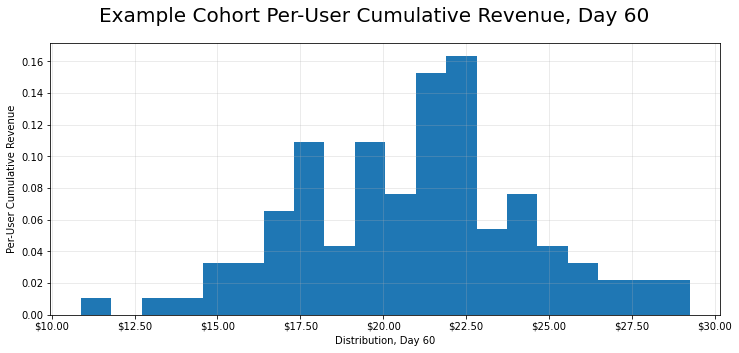

In [153]:
###
fig, ax = plt.subplots( 1, 1, figsize=( 12, 5 ) )

ax.hist( non_zero_users.loc[ :, 60 ], density=True, bins=20 )

ax.grid( alpha=0.3 )

x_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.xaxis.set_major_formatter( x_tick )

ax.set_xlabel( "Distribution, Day 60" )
ax.set_ylabel( "Per-User Cumulative Revenue" )

plt.suptitle( "Example Cohort Per-User Cumulative Revenue, Day 60", fontsize=20 )

plt.show()

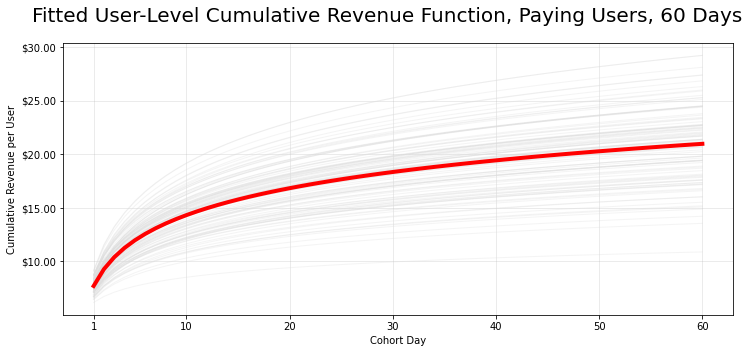

In [162]:
non_zero_users = users_df[ users_df[ 60 ] > 0 ]
x_data = np.concatenate( [ x ] * len( non_zero_users ) )
y_data = non_zero_users.values.flatten()
popt, pcov = curve_fit( rev_function, x_data, y_data )

fitted_values = [ rev_function( x_val, *popt ) for x_val in x ]

## plot violin plus fitted values

fig, ax = plt.subplots( 1, 1, figsize=( 12, 5 ) )

for i, row in non_zero_users.iterrows():
    ax.plot( x, row, linewidth=1, color='gainsboro', alpha=0.3 )

ax.plot( x, fitted_values, linewidth=4, color='red', linestyle='solid' )

ax.grid( alpha=0.3 )
ax.set_xticks( [ x_val for x_val in x if x_val in [ 1, 60 ] or x_val % 10 == 0  ] )

y_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.yaxis.set_major_formatter( y_tick )

ax.set_xlabel( "Cohort Day" )
ax.set_ylabel( "Cumulative Revenue per User" )

plt.suptitle( "Fitted User-Level Cumulative Revenue Function, Paying Users, 60 Days", fontsize=20 )

plt.show()

100

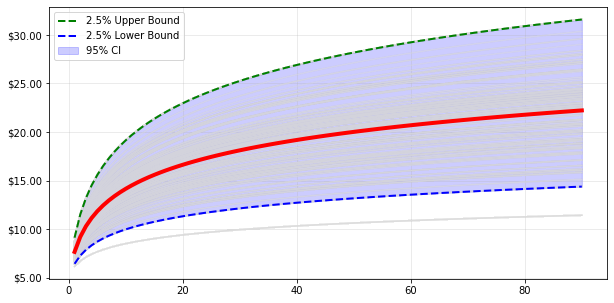

In [179]:
projection_endpoint = 90

## create the projection dataframe
x_projected = np.arange( 1, projection_endpoint + 1 )
non_zero_users_bootstrap_projected = pd.DataFrame( columns=x_projected )

## create the plot
fig, ax = plt.subplots( 1, 1, figsize=( 10, 5 ) )

## bootstrap the nonzero dataset 10x
non_zero_users_bootstrap = non_zero_users.sample( frac=10, replace=True )

for i, row in non_zero_users_bootstrap.iterrows():
    ## run the curve fit on this row
    x_data = x
    y_data = row
    popt, pcov = curve_fit( rev_function, x_data, y_data )
    ## create the user's projection
    fitted_values = [ rev_function( x_val, *popt ) for x_val in x_projected ]
    ## add to the projection df
    non_zero_users_bootstrap_projected.loc[ len( non_zero_users_bootstrap_projected ) ] = fitted_values
    ## plot the user's projection
    ax.plot( x_projected, fitted_values, color='gainsboro', alpha=0.1 )

## mean of the projections
mean_projection = non_zero_users_bootstrap_projected.mean()
ax.plot( x_projected, mean_projection, color='red', linewidth=4 )

## CI
lower_bound = non_zero_users_bootstrap_projected.quantile( 0.025 )
upper_bound = non_zero_users_bootstrap_projected.quantile( 0.975 )
ax.plot( x_projected, upper_bound, linestyle='--', linewidth=2, color='green', \
    label='2.5% Upper Bound')
ax.plot( x_projected, lower_bound, linestyle='--', linewidth=2, color='blue', \
    label='2.5% Lower Bound')
ax.fill_between(x_projected, lower_bound, upper_bound, color='blue', alpha=0.2, label='95% CI')

y_tick = mtick.StrMethodFormatter( '${x:,.2f}' )
ax.yaxis.set_major_formatter( y_tick )

ax.legend()

ax.grid( alpha=0.3 )
plt.show()


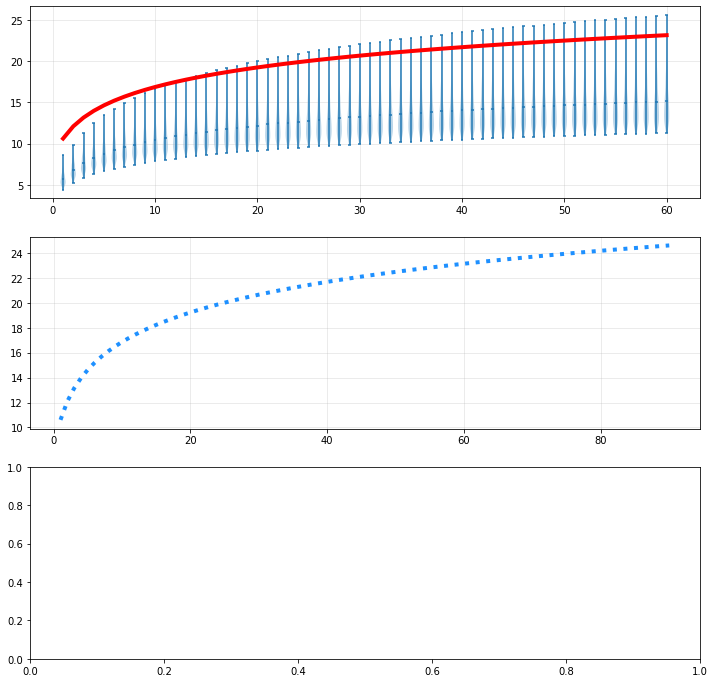

In [48]:


x_90 = np.arange( 1, 90 + 1 )
fitted_values_90 = [ rev_function( x_val, *popt ) for x_val in x_90 ]

axes[ 1 ].plot( x_90, fitted_values_90, color='dodgerblue', linewidth=4, linestyle='dotted' )
axes[ 1 ].grid( alpha=0.3 )